## Лабораторная работа 2 
# "Выявление корреляций в выборке"

В этой работе рассматриваются данные о клиентах банка. В них указаны возраст клиентов, пол, образование, доход и есть целевая переменная - вернул ли клиент кредит.
На основе этих данных мы выясним какие из показателей влияют на вероятность того, что клиент не вернет кредит
Для начала зарузим библиотеки, необходимые в работе.
Обратите особое внимание на библиотеку skipy.stats. Она нужна для работы с распределениями

In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from scipy import stats # в этой библиотеке хранятся функции для работы с распределениями
import scipy
%matplotlib inline


In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
#считаем данные и посмотрим на них
data = pd.read_csv('/content/drive/MyDrive/Math_Model/credit_card_default_analysis.csv')
data.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,1,20000,2,2,1,24,2,2,0,0,0,0,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,0,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,0,0,0,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [ ]:
#посмотрим на объем выборки в целом
data.shape

(30000, 25)

In [ ]:
#посмотрим на объем выборки по отданным и не отданным кредитам
data.default.value_counts()

0    23364
1     6636
Name: default, dtype: int64

Явно выборки по признаку default не сбалансированы

In [ ]:
def permutation_t_stat_ind(sample1, sample2):
    return np.mean(sample1) - np.mean(sample2)

## Задание 1

Разделите выборку на 2 группы по признаку вернули кредит или нет.

In [ ]:
# Ваш код здесь
x = data[data.default == 0] 
y = data[data.default == 1] 
print("Первые 5 строк с теме кто вернул кредит", x.shape)
display(x.head())
print("\n\n\nПервые 5 строк с теме кто не вернул кредит", y.shape)
display(y.head())

Первые 5 строк с теме кто вернул кредит (23364, 25)


,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
2,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,0,0,0,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0
5,6,50000,1,1,2,37,0,0,0,0,0,0,64400,57069,57608,19394,19619,20024,2500,1815,657,1000,1000,800,0
6,7,500000,1,1,2,29,0,0,0,0,0,0,367965,412023,445007,542653,483003,473944,55000,40000,38000,20239,13750,13770,0





Первые 5 строк с теме кто не вернул кредит (6636, 25)


,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,1,20000,2,2,1,24,2,2,0,0,0,0,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,0,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
13,14,70000,1,2,2,30,1,2,2,0,0,2,65802,67369,65701,66782,36137,36894,3200,0,3000,3000,1500,0,1
16,17,20000,1,1,2,24,0,0,2,2,2,2,15376,18010,17428,18338,17905,19104,3200,0,1500,0,1650,0,1
21,22,120000,2,2,1,39,0,0,0,0,0,0,316,316,316,0,632,316,316,316,0,632,316,0,1


Постройте распределения признака "лимитный кредит" в обеих группах

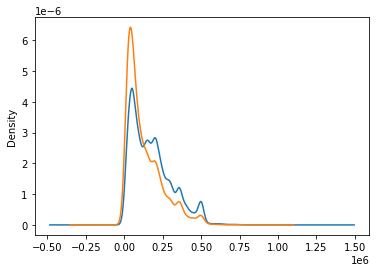

In [ ]:
# Ваш код здесь
rasx = x['LIMIT_BAL']
rasx.plot.kde()

#цвет-желтый
rasy = y['LIMIT_BAL']
rasy.plot.kde()

Оцените распределения по внешнему виду

Выводы: По графику видно, что распределения лимитов для групп похожие друг на друга. Для группы, которая вернула кредит, размер кредитного лимита выше.

Относительно двух групп людей вернувших и не вернувших кредит проверьте следующие гипотезы: a) о равенстве медианных значений размера лимитного кредита b) о равенстве распределений с помощью одного из подходящих непараметрических критериев проверки равенства средних. Значимы ли полученные результаты с практической точки зрения ?

1.а) гипотеза о равенстве медианных значений размера лимитного кредита.

H0 - медианные значения равны, а  H1 - не равны.
Построим доверительные интервалы, если они не перескутся, то нулевую гипотезу отвергним

In [ ]:
#функция для бутстрапа
def get_bootstrap_samples(data, n_samples):
    indices = np.random.randint(0, len(data), (n_samples, len(data)))
    samples = data[indices]
    return samples

In [ ]:
#функция для расчета доверительного интервала
def stat_intervals(stat, alpha):
    boundaries = np.percentile(stat, [100 * alpha / 2., 100 * (1 - alpha / 2.)])
    return boundaries

In [ ]:
#создаем массивы признаков
defaultZero = data[data.default==0].LIMIT_BAL.values # кредитный лимит, для тех кто вернул кредит
defaultOne   = data[data.default==1].LIMIT_BAL.values # кредитный лимит, для тех кто не вернул кредит

#print(type(defaultOne), defaultOne.shape, max(defaultOne), max(defaultZero))

<class 'numpy.ndarray'> (6636,) 740000 1000000


In [ ]:
alpha = 0.05 #Уровень доверия 95%
#фиксируем генератор случайных чисел
np.random.seed(0)
#создаем по 1000 выборок и считаем на них медиану
# используя map()
defaulOneMedian = list( map(np.median,  get_bootstrap_samples(defaultOne, 1000)) ) 
defaultZeroMedian = list( map(np.median,  get_bootstrap_samples(defaultZero, 1000)) )

#Уровень доверия 95%
сonfidenceIntervalZero = np.array( stat_intervals(defaultZeroMedian, alpha))
сonfidenceIntervalOne  = np.array( stat_intervals(defaulOneMedian, alpha) )
print("Доверительный интервалы для тех кто платит: ", сonfidenceIntervalZero)
print("Доверительный интервалы для тех кто не платит: ", сonfidenceIntervalOne)

#Сравниваем интервалы 
diffConfidenceInterval = сonfidenceIntervalZero - сonfidenceIntervalOne
print("Разница между доверительным интервалом тек кто платил и тех кто не платит: ", diffConfidenceInterval)
# Ваш код здесь

Доверительный интервалы для тех кто платит:  [150000. 150000.]
Доверительный интервалы для тех кто не платит:  [80000. 90000.]
Разница между доверительным интервалом тек кто платил и тех кто не платит:  [70000. 60000.]


Ваши выводы здесь
Нулевую гипотезу мы отвергаем, т.к. доверительный интервал для разницы кредитного лимита между тех кто платит и тех кто не платит, больше  нуля. То есть интервалы не пересикаются. Значит данные выборки статистически значисмые. 

 b) о равенстве распределений с помощью одного из подходящих непараметрических критериев проверки равенства средних

H0 - распределения равны;
H1 - не равны.

In [ ]:
def get_random_combinations(n1, n2, max_combinations):
    index = list ( range(n1 + n2) ) 
    indices = set([tuple(index)])
    print(np.random.shuffle(index))
    for i in range(max_combinations - 1):
        np.random.shuffle(index)
        indices.add(tuple(index))
    return [(index[:n1], index[n1:]) for index in indices]

In [ ]:
def permutation_zero_dist_ind(sample1, sample2, max_combinations = None):
    joined_sample = np.hstack((sample1, sample2))
    n1 = len(sample1)
    n = len(joined_sample)
    
    if max_combinations:
        indices = get_random_combinations(n1, len(sample2), max_combinations)
    else:
        indices = [(list(index), filter(lambda i: i not in index, range(n))) \
                    for index in itertools.combinations(range(n), n1)]
    
    distr = [joined_sample[list(i[0])].mean() - joined_sample[list(i[1])].mean() \
             for i in indices]
    return distr

In [ ]:
def permutation_zero_dist_ind(sample1, sample2, max_combinations = None):
    joined_sample = np.hstack((sample1, sample2))
    n1 = len(sample1)
    n = len(joined_sample)
    
    if max_combinations:
        indices = get_random_combinations(n1, len(sample2), max_combinations)
    else:
        indices = [(list(index), filter(lambda i: i not in index, range(n))) \
                    for index in itertools.combinations(range(n), n1)]
    
    distr = [joined_sample[list(i[0])].mean() - joined_sample[list(i[1])].mean() \
             for i in indices]
    return distr

In [ ]:
def permutation_test(sample, mean, max_permutations = None, alternative = 'two-sided'):
    if alternative not in ('two-sided', 'less', 'greater'):
        raise ValueError("alternative not recognized\n"
                         "should be 'two-sided', 'less' or 'greater'")
    
    t_stat = permutation_t_stat_ind(sample, mean)
    
    zero_distr = permutation_zero_dist_ind(sample, mean, max_permutations)
    
    if alternative == 'two-sided':
        return sum([1. if abs(x) >= abs(t_stat) else 0. for x in zero_distr]) / len(zero_distr)
    
    if alternative == 'less':
        return sum([1. if x <= t_stat else 0. for x in zero_distr]) / len(zero_distr)

    if alternative == 'greater':
        return sum([1. if x >= t_stat else 0. for x in zero_distr]) / len(zero_distr)

In [ ]:
#Проверка вероятности достоверности гипотезы
pValue = permutation_test(defaultZero, defaultOne, max_permutations=1000)
print("Достигаемый уровень значимости перестановочного критерия:", pValue)

None
Достигаемый уровень значимости перестановочного критерия: 0.001


Непараметрический перестановочный критерий для двух независимых выборок дает достигаемый уровень значимости намного меньше 0.05.
Из этого можно сделать вывод, что гипотеза о равенстве распределений отвергается.
С практической точки зрения этот результат говорят о том, что банк выдает большие кредиты надежным клиентам, которые не просрочивали выплаты.

## Второе задание

Проверьте гипотезу о том, что гендерный состав группы людей вернувших и не вернувших кредит отличается.


Н0 - что гендерный состав группы не отичается;

Н1 - что гендерный состав группы отличается. 

In [ ]:
#Проверка через z-критерий
sexDefaultZero = np.mod(data[data['default'] == 0]['SEX'],2)
sexDefaultOne = np.mod(data[data['default'] == 1]['SEX'],2) 
#print(sexdefaultZero)

In [ ]:
#функция для расчета статистики
# здесь Ваш код
def proportions_diff_z_stat_ind(sample1, sample2):
    n1 = len(sample1)
    n2 = len(sample2)
    
    p1 = float(sum(sample1)) / n1
    p2 = float(sum(sample2)) / n2 
    P = float(p1*n1 + p2*n2) / (n1 + n2)
    
    return (p1 - p2) / np.sqrt(P * (1 - P) * (1. / n1 + 1. / n2))

In [ ]:
#функция для расчета Z критерия
def proportions_diff_z_test(z_stat, alternative = 'two-sided'):
    if alternative not in ('two-sided', 'less', 'greater'):
        raise ValueError("alternative not recognized\n"
                         "should be 'two-sided', 'less' or 'greater'")
    
    if alternative == 'two-sided':
        return 2 * (1 - scipy.stats.norm.cdf(np.abs(z_stat)))
    
    if alternative == 'less':
        return scipy.stats.norm.cdf(z_stat)

    if alternative == 'greater':
        return 1 - scipy.stats.norm.cdf(z_stat)

In [ ]:
p_value =  proportions_diff_z_test(proportions_diff_z_stat_ind(sexDefaultZero, sexDefaultOne)) #H1 != H0
print("p-value: {:.15f}".format(p_value))

p-value: 0.000000000004473


Вывод: проверив с помощью Z критерия выяснили, что гипотиза H0 отвергается потомучто p-value < 0,05

Проверьте гипотезу с помощью доверительных интервалов

In [ ]:
#функция для расчета доверительного интервала
def proportions_diff_confint_ind(sample1, sample2, alpha = 0.05):    
    z = scipy.stats.norm.ppf(1 - alpha / 2.)
    
    p1 = float(sum(sample1)) / len(sample1)
    p2 = float(sum(sample2)) / len(sample2)
    
    left_boundary = (p1 - p2) - z * np.sqrt(p1 * (1 - p1)/ len(sample1) + p2 * (1 - p2)/ len(sample2))
    right_boundary = (p1 - p2) + z * np.sqrt(p1 * (1 - p1)/ len(sample1) + p2 * (1 - p2)/ len(sample2))
    
    return (left_boundary, right_boundary)

In [ ]:
# Здесь Ваш код
interval = proportions_diff_confint_ind(sexDefaultZero,sexDefaultOne, alpha)
print("Доверительный интервал находится в интервале между:", interval[0], interval[1])

Доверительный интервал находится в интервале между: -0.060548077974896725 -0.03363493274962867


Вывод: гендорный состав отличается на 3%-6%. 

## Третье задание 

In [ ]:
print()

Проверьте гипотезу о том, что образование не влияет на то, вернет ли человек долг. Используйте stats.chi2_contingency() функцию для расчета кси-квадрат критерия

H0 -уровень образования не влияет на возврат кредита

H1 -  влияет

In [ ]:
# Здесь Ваш код
tableEdu = pd.crosstab( data.default, data.EDUCATION)
print(tableEdu)
chi2, pVal, dof, ex = stats.chi2_contingency(pd.crosstab( data.default, data.EDUCATION))
print("chi2 contingency: {:.4f}, p-value: {}".format( chi2, pVal))


EDUCATION   0     1      2     3    4    5   6
default                                       
0          14  8549  10700  3680  116  262  43
1           0  2036   3330  1237    7   18   8
chi2 contingency: 163.2166, p-value: 1.2332626245415605e-32


Постройте график, отражающий уровень образования и разницу в прогнозе по возврату кредита

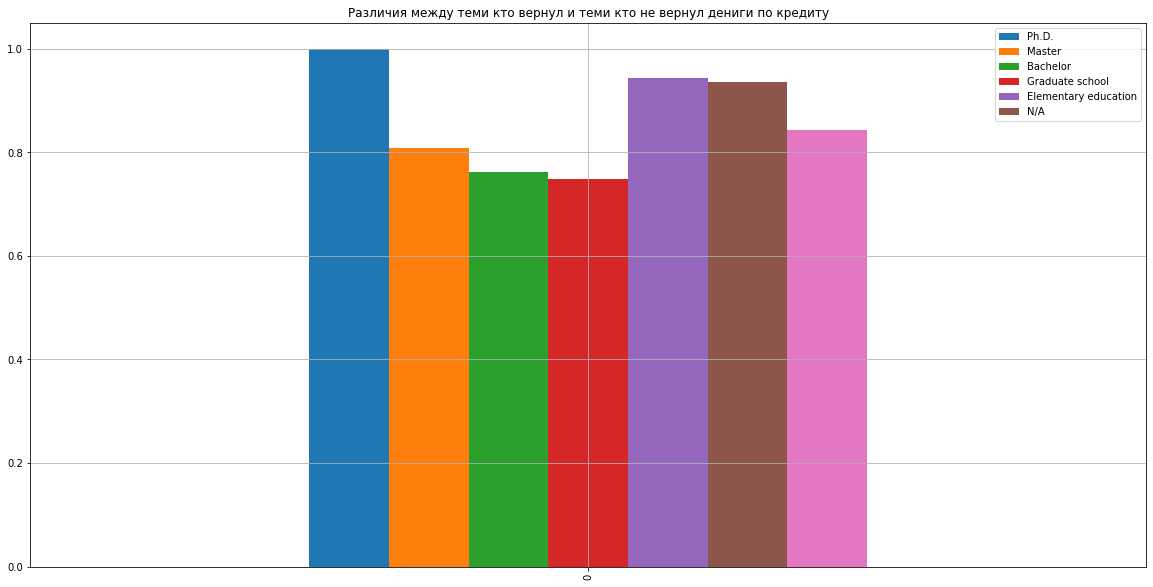

In [ ]:
# Здесь Ваш код
eduNames = ["Ph.D.", "Master", "Bachelor", "Graduate school", "Elementary education", "N/A"]
eduDefaultZero = tableEdu.loc[0]
eduDefaultOne  = tableEdu.loc[1]

eduDiffScaled = np.array(eduDefaultZero) / np.array(tableEdu.sum())

tableEduDiffScaled = pd.DataFrame(eduDiffScaled.reshape(1,7), columns=tableEdu.columns)

tableEduDiffScaled.plot.bar(figsize=(20, 10))
plt.title("Различия между теми кто вернул и теми кто не вернул дениги по кредиту")
plt.legend(eduNames)
plt.grid()
plt.show()

Исходя из графика видно, что распределние не является равномерным, следовательно, образование влияет на то, вернёт ли человек долг. Реже всего возвращают долги категории Bachelor, Graduate school. Возвращают практически все долги только люди с Ph.D..

## Четвертое задание 

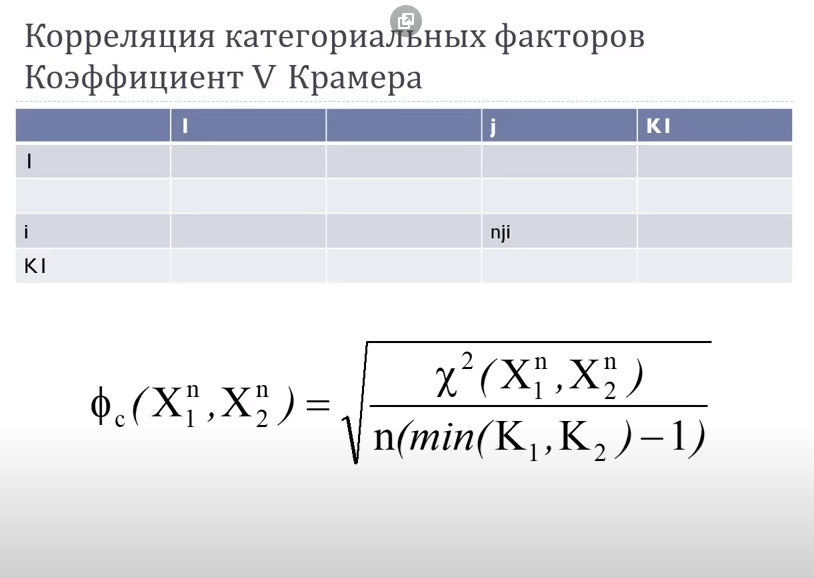

Проверьте, как связан семейный статус с индикатором дефолта: нужно предложить меру, по которой можно измерить возможную связь этих переменных и посчитать ее значение

H0 - семейное положение не связано;

H1 -  связано

In [ ]:
# здесь Ваш код
tabletMar = pd.crosstab( data.default, data.MARRIAGE)

chi2, p, dof, exp = stats.chi2_contingency(tabletMar)
print('p-value = ', p)

#коэффициент V Крамера
n = data.shape[0] 
vCramer = ( chi2 / (n*(min(tabletMar.shape)-1))) ** 0.5
print('V Крамер = {:.4f}'.format(vCramer) )




p-value =  8.825862457577375e-08
V Крамер = 0.0345


Выводы: Так p-value близко к 0, значит связь крайне мала. Поэтому отвергаем нулевую гипотезу. 
Семейное положение заемщика связано с возвратои или невозвратом кредита


## Пятое задание

Относительно двух групп людей вернувших и не вернувших кредит проверьте следующие гипотезы: a) о равенстве медианных значений возрастов людей b) о равенстве распределений с помощью одного из подходящих непараметрических критериев проверки равенства средних. Значимы ли полученные результаты с практической точки зрения ?

 ### 1.а

H0 - возраст не влияет;

H1 - возраст влияет.

In [ ]:
# Здесь Ваш код
AgeDefaultZero = data[data.default==0].AGE.values # возраст, тех кто вернул кредит
AgeDefaultOne  = data[data.default==1].AGE.values # возоаст, для тех кто не вернул кредит

#Test
print("Проверим медианы возрастов")
print("Медиана для тек кто вернул {} \nМедиана для тек кто не вернул {} ".format(np.median(AgeDefaultZero),np.median(AgeDefaultOne)) )
#print(type(AgeDefaultOne), AgeDefaultOne.shape, max(AgeDefaultOne), max(AgeDefaultZero))

Проверим медианы возрастов
Медиана для тек кто вернул 34.0 
Медиана для тек кто не вернул 34.0 


In [ ]:
#фиксируем генератор случайных чисел
np.random.seed(0)
#создаем по 1000 выборок и считаем на них медиану
# используя map()
AgeDefaulOneMedian = list( map(np.median,  get_bootstrap_samples(AgeDefaultOne, 1000)) ) 
AgeDefaultZeroMedian = list( map(np.median,  get_bootstrap_samples(AgeDefaultZero, 1000)) )

print(set(defaulOneMedian))
#Уровень доверия 95%
сonfidenceIntervalZero = np.array( stat_intervals(AgeDefaultZeroMedian, alpha))
сonfidenceIntervalOne  = np.array( stat_intervals(AgeDefaulOneMedian, alpha) )
print("Доверительный интервалы для тех кто платит: ", сonfidenceIntervalZero)
print("Доверительный интервалы для тех кто не платит: ", сonfidenceIntervalOne)

#Сравниваем интервалы 
diffConfidenceInterval = сonfidenceIntervalZero - сonfidenceIntervalOne
print("Разница между доверительным интервалом тек кто платил и тех кто не платит: ", diffConfidenceInterval)

{90000.0, 85000.0, 80000.0, 100000.0}
Доверительный интервалы для тех кто платит:  [34. 34.]
Доверительный интервалы для тех кто не платит:  [34. 35.]
Разница между доверительным интервалом тек кто платил и тех кто не платит:  [ 0. -1.]


Выводы: так как Доверительный интервалы пересикаются, а разница имеет ноль, можно сделать вывод, что возраст не влияет на выплату кредита. Принимаем гипотезу H0.

 ### 1.b

H0 - распределения выборок полностью равны

H1 - распределения выборок отличаются 

In [ ]:
pValue = permutation_test(AgeDefaultZero, AgeDefaultOne, max_permutations=1000)
print("Достигаемый уровень значимости перестановочного критерия:", pValue)

None
Достигаемый уровень значимости перестановочного критерия: 0.013


Непараметрический перестановочный критерий для двух независимых выборок дает достигаемый уровень значимости намного меньше 0.05. Из этого можно сделать вывод, что гипотеза о равенстве распределений отвергается. С практической точки зрения этот результат говорит о том, что банку всеравно на возраст клиента

#Выводы по всей лабораторной:
в ходе лабораторной работы было выяснено, что на выдачу больших кредитов влияет надёжность заёмщика, пол заёмщика, его образование и семейное положение важно для выдачи кредита, а вот его возраст незначительно влияет.  